In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import seaborn as sns

In [2]:
water = pd.read_csv("data/water_data/data_2012.csv")
rain = pd.read_csv("data/rf_data/rf_2012.csv")

* 서울 동쪽에 팔당댐이 있고 물이 도착하는 순서대로 청담대교 - 잠수교 - 한강대교 - 행주대교가 있음

</br>

* 대곡교 : 서울특별시 강남구 세곡동 486-2
    * 청담대교 입구쪽으로 지류가 있음
    * 대곡교 강수량은 청담대교 데이터에 가장 큰 영향을 미칠 것으로 예상

* 진관교 : 경기도 남양주시 진건읍 신월리
    * 팔당댐과 청담대교 중간으로 지류가 있음
    * 한강과 거리가 어느정도 있어 데이터에 얼마나 영향이 있을지는 미지수

* 송정동 : 성동구 송정동
    * 청담대교와 잠수교 사이로 지류가 나있음
    * 송정동 강수량은 잠수교에 가장 큰 영향을 미칠 것으로 예상


In [3]:
water.head()
# 총 방류량 : tototf
# 청담대교 수위 : wl_1018662
# 잠수교 수위 : wl_1018680
# 한강대교 수위 : wl_1018683
# 행주대교 수위 : wl_1019630

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18
1,2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18
2,2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18
3,2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17
4,2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29


In [4]:
t = water["tototf"]
f_1 = water["fw_1018662"]
w_1 = water["wl_1018662"]

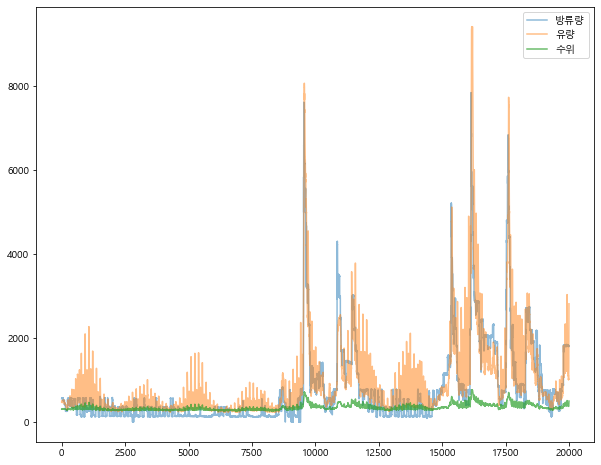

In [5]:
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(10,8))

line_t = plt.plot(t[:20000], label="방류량")
plt.setp(line_t, alpha=0.5)
line_f = plt.plot(f_1[:20000], label="유량")
plt.setp(line_f, alpha=0.5)
line_w = plt.plot(w_1[:20000], label="수위")
plt.setp(line_w, alpha=0.7)
plt.legend()

# 강우량 데이터
# ax2 = plt.twinx()
# line_r = ax2.plot(rain["rf_10184100"][:20000], label="강우량", color="red", alpha=0.4)
# plt.setp(line_r, alpha=0.7)

* *수위는 유량과 정확한 선형 관계가 있는 것으로 판단됨*
    * 유량의 변화가 수위에 아주 작은 스케일로 반영됨
    * 따라서 유량 데이터를 잘 예측할 수 있다면 이를 통해 수위를 예측하는것도 가능할것같음
    * 그러나 유량 데이터도 결측치가 굉장히 많았기 때문에 이를 잘 처리할 방법이 필요함

[None]

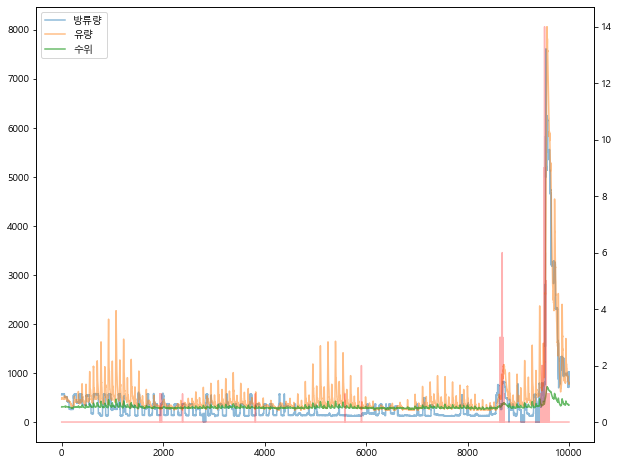

In [6]:
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(10,8))

line_t = plt.plot(t[:10000], label="방류량")
plt.setp(line_t, alpha=0.5)
line_f = plt.plot(f_1[:10000], label="유량")
plt.setp(line_f, alpha=0.5)
line_w = plt.plot(w_1[:10000], label="수위")
plt.setp(line_w, alpha=0.7)
plt.legend()

ax2 = plt.twinx()
line_r = ax2.plot(rain["rf_10184100"][:10000], label="강우량", color="red")
plt.setp(line_r, alpha=0.3)

* 강우량이 작을 때 다른 데이터에 큰 변화를 미치지 않는것으로 판단됨. 그러나 아주 높은 수치에 대해선 크게 영향을 미침

In [7]:
w_list = sorted(glob("data/water_data/*.csv"))
print(w_list)

['data/water_data\\data_2012.csv', 'data/water_data\\data_2013.csv', 'data/water_data\\data_2014.csv', 'data/water_data\\data_2015.csv', 'data/water_data\\data_2016.csv', 'data/water_data\\data_2017.csv', 'data/water_data\\data_2018.csv', 'data/water_data\\data_2019.csv', 'data/water_data\\data_2020.csv', 'data/water_data\\data_2021.csv', 'data/water_data\\data_2022.csv']


In [8]:
df = pd.read_csv(w_list[0], index_col=0)
for i in w_list[1:]:
    df = pd.concat([df, pd.read_csv(i, index_col=0)])

df.shape

(276336, 14)

In [9]:
for column in df:
    print(f"nan count of {column} : {df[str(column)].isna().sum()}")
    print(f"zero count of {column} : {(df[str(column)]==0).sum()}")
    print("========================")

nan count of swl : 743
zero count of swl : 83
nan count of inf : 743
zero count of inf : 10122
nan count of sfw : 743
zero count of sfw : 82
nan count of ecpc : 743
zero count of ecpc : 0
nan count of tototf : 743
zero count of tototf : 447
nan count of tide_level : 4927
zero count of tide_level : 0
nan count of wl_1018662 : 59
zero count of wl_1018662 : 6912
nan count of fw_1018662 : 16380
zero count of fw_1018662 : 0
nan count of wl_1018680 : 59
zero count of wl_1018680 : 6912
nan count of fw_1018680 : 196849
zero count of fw_1018680 : 79487
nan count of wl_1018683 : 59
zero count of wl_1018683 : 6912
nan count of fw_1018683 : 1279
zero count of fw_1018683 : 183
nan count of wl_1019630 : 59
zero count of wl_1019630 : 6912
nan count of fw_1019630 : 59
zero count of fw_1019630 : 0


## 결측치, 0값 체크

* 잠수교 유량 컬럼은 결측치와 0이 거의 대부분을 차지함. 결측치 처리를 아주 잘 하여 사용하거나, 아예 제외하는것이 좋을듯
* 결측치가 없는 컬럼은 없으나, 행주대교 유량 컬럼의 결측치가 59, 0이 0개로 가장 완결됨
* 다음으로 청담대교 유량의 결측치가 16380으로 많았고, 이외에도 몇개의 컬럼에서 7000여개의 결측치나 0값이 있음

## 이상치 체크
* 확실한것
    * 팔당댐 현재수위(swl)가 0인 경우
    * 팔당댐 저수량(sfw)가 0인 경우
    * 팔당댐 공용량(ecpc)가 250에 가깝게 치솟은 경우
        * sfw와 ecpc가 같은 순간에 값이 튐. 오류인지 직접 확인해야함. 오류가 아니더라도 원할한 학습을 위해 빼는것도 고려
        * 확인 결과 지속적으로 0이 아니라 정상값 사이사이에 0이 포함된것이었음. 이들은 정상 데이터를 보간하여 사용하면 될듯
    * 청담대교 수위(wl_1018662)가 0인 경우
    * 잠수교 수위(wl_1018680)가 0인 경우
    * 잠수교 유량(fw_1018680)은 그냥 다 문제
    * 한강대교 수위(wl_1018683)가 0인 경우
    * 한강대교 유량(fw_1018683)가 음수인 경우
    * 행주대교 수위(wl_1019630)가 0인 경우
        * 대교들의 수위가 0인 경우는 모두 같은 순간에 나타남
        * 확인 결과 이상치가 맞음. 올바른 값으로 대체해야함

* 확실하지않은것
    * 팔당댐 유입량(inf)이 0인 경우
    * 총 방류량(tototf)가 15000 이상 치솟은 경우

In [10]:
plt.figure(figsize=(15, 6))
#plt.plot(df["swl"].values)
#plt.plot(df["inf"].values)
#plt.plot(df["sfw"].values)
#plt.plot(df["tide_level"].values)
#plt.plot(df["wl_1018662"].values)
#plt.plot(df["fw_1018662"].values)
#plt.plot(df["wl_1018680"].values)
#plt.plot(df["fw_1018680"].values)
#plt.plot(df["wl_1018683"].values)
#plt.plot(df["fw_1018683"].values)
#plt.plot(df["wl_1019630"].values)
#plt.plot(df["fw_1019630"].values)

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

# 변수간 상관관계 측정
* 결측값이 가장 적은 행주대교로 계산

(276336, 8)
(270610, 8)


E:\anaconda\envs\data\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
E:\anaconda\envs\data\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


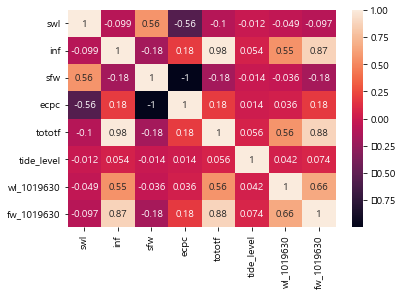

In [12]:
df1 = df[["swl", "inf", "sfw", "ecpc", "tototf", "tide_level", "wl_1019630", "fw_1019630"]]
print(df1.shape)
df1 = df1.dropna()
print(df1.shape)
sns.heatmap(df1.corr(), annot=True)
plt.show()

* 행주대교 수위는 유량, 총 방류량, 팔당댐 유입량 컬럼과 높은 상관관계가 있음
* 위 세 컬럼의 데이터 전처리 중요!!
</br></br>
* 팔당댐 유입량과 총 방류량은 0.98로 아주 아주 높은 상관관계가 있음. 이상치를 처리할 때 서로의 데이터를 사용할 수 있을듯
* 또한 세 컬럼은 서로 0.6 이상의 높은 상관관계가 있으므로 이 또한 사용할 수 있을듯함
</br></br>
* 팔당댐 공용량과 팔당댐 저수량은 서로 더하면 244가 됨. 0.01정도의 오차가 발생하기도 함